In [1]:
import os
import numpy as np

import yaml
import json
import matplotlib.pyplot as plt
import mdtraj
import urllib.request
import seaborn as sns

from OrderParameter import *

# Download link
def download_link(doi, file):
    if "zenodo" in doi.lower():
        zenodo_entry_number = doi.split(".")[2]
        return 'https://zenodo.org/record/' + zenodo_entry_number + '/files/' + file
    else:
        print ("DOI provided: {0}".format(doi))
        print ("Repository not validated. Please upload the data for example to zenodo.org")
        return ""

In [2]:
def read_mapping_file(mapping_file, atom1, atom2):
    with open(mapping_file, 'rt') as mapping_file:
            for line in mapping_file:
                if atom1 in line:
                    m_atom1 = line.split()[1]
#                    print(m_atom1)
                if atom2 in line: 
                    m_atom2 = line.split()[1]
#                    print(m_atom2)
    return m_atom1, m_atom2

## Calculate the the angle between PN vector and z-axis  and plot the distribution of angles for each simulation

In [3]:
#def findPNangle(lipid, atom1, atom2, tpr_name, trj_name, gro_name, mapping):
#    if molname == 'POPG':
#        atoms = read_mapping_file(mapping_file, atom1 , atom2_POPG)
#    else:
#        atoms = read_mapping_file(mapping_file, atom1, atom2)
#    try:
#        anglesMeanError = read_trj_PN_angles(lipid, atoms, tpr_name, trj_name, gro_name)
#    except OSError:
#        print("Could not calculate angles for " + lipid + " from files " + tpr_name + " and " + trj_name)
#        continue
#    angles = anglesMeanError[0]
#    resAverageAngles = anglesMeanError[1]
#    totalAverage = anglesMeanError[2]
#    totalAverageError = anglesMeanError[3]
    
#    return 

POPC
Cosine is too large = -1.0000000203979367 --> truncating it to +/-1.0


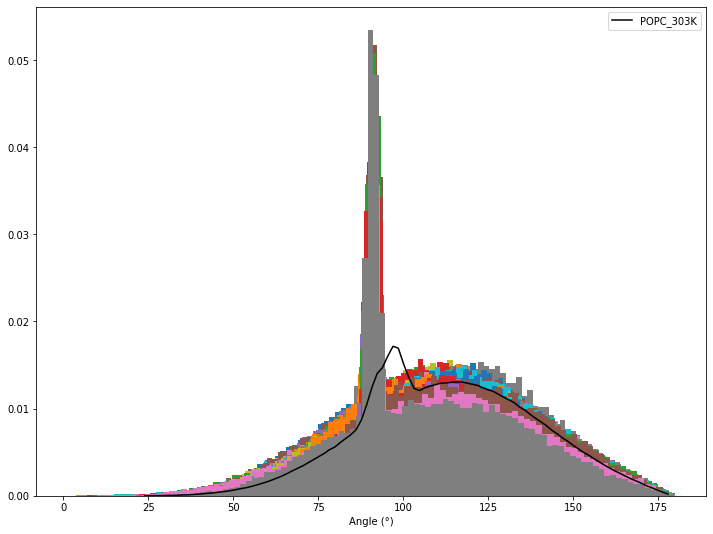

In [4]:
#Calculate the angle between PN vector and z-axis for each lipid residues

lipids = {'POPC'} #,'POPS','POPE','POPG'}
atom1 = 'M_G3P2_M'
atom2 = 'M_G3N6_M'
atom2_POPG = 'M_G3C6_M'

colors = {'POPC' :'black','POPS':'red','POPE':'blue','POPG':'green'}

#fig= plt.figure(figsize=(12,9))


h = []


for subdir, dirs, files in os.walk(r'/media/akiirikk/DATADRIVE1/tietokanta/NMRlipidsIVPEandPG/Data/Simulations/'):
    for filename in files:
        filepath = subdir + os.sep + filename
        if filepath.endswith("README.yaml"):
            READMEfilepath = subdir + '/README.yaml'
            with open(READMEfilepath) as yaml_file:
                readme = yaml.load(yaml_file, Loader=yaml.FullLoader)
                for molname in lipids:
                    doi = readme.get('DOI')
                    trj = readme.get('TRJ')
                    tpr = readme.get('TPR')
                    trj_name = subdir + '/' + readme.get('TRJ')[0][0]
                    tpr_name = subdir + '/' + readme.get('TPR')[0][0]
                    gro_name = subdir + '/conf.gro'
                    trj_url = download_link(doi, trj[0][0])
                    tpr_url = download_link(doi, tpr[0][0])
                    
                   # trj_name = '/media/akiirikk/DATADRIVE1/tietokanta/temp/DATAbankTST/' + molname + 'charmm/tmp/0/'+readme.get('TRJ')[0][0]
                   #tpr_name = '/media/akiirikk/DATADRIVE1/tietokanta/temp/DATAbankTST/' + molname + 'charmm/tmp/0/'+readme.get('TPR')[0][0]

                    #Download tpr and xtc files to same directory where dictionary and data are located
                    if (not os.path.isfile(tpr_name)):
                        response = urllib.request.urlretrieve(tpr_url, tpr_name)
                        
                    if (not os.path.isfile(trj_name)):
                        response = urllib.request.urlretrieve(trj_url, trj_name)
                        
                    
                
                    if sum(readme['N' + molname]) > 0:
                        fig= plt.figure(figsize=(12,9))
                        if (not os.path.isfile(gro_name)):
                            !echo System | gmx trjconv -f {trj_name} -s {tpr_name}  -dump 0 -o {gro_name}
                            
                        print(molname)
                        mapping_file = readme.get('MAPPING')[0][0]
                       # print(mapping_file)
                        if molname == 'POPG':
                            atoms = read_mapping_file(mapping_file, atom1 , atom2_POPG)
                        else:
                            atoms = read_mapping_file(mapping_file, atom1, atom2)
                        try:
                            anglesMeanError = read_trj_PN_angles(molname, atoms, tpr_name, trj_name, gro_name)
                        except OSError:
                            print("Could not calculate angles for " + molname + " from files " + tpr_name + " and " + trj_name)
                            continue
                        angles = anglesMeanError[0]
                        resAverageAngles = anglesMeanError[1]
                        totalAverage = anglesMeanError[2]
                        totalAverageError = anglesMeanError[3]
                        
                        #print(resAverageAngles)
                        
                        #fig= plt.figure(figsize=(12,9))
                       # print(len(angles))
                        dist = [ 0 for i in range(len(angles))]
                        distSUM = [ 0 for i in range(100)]
                       # print(distSUM)
                        for i in range(len(angles)):
                            dist[i] = plt.hist(angles[i], bins=100, density=True)
                            distSUM = np.add(distSUM,dist[i][0])
                            
                       # print(distSUM)
                        distSUM = [x / len(angles) for x in distSUM]
                        #print(len(dist))
                        xaxis = [ 0 for i in range(len(dist[0][1])-1)]
                        for i in range(len(dist[0][1])-1):
                            xaxis[i]=(dist[0][1][i])
                            
                        #h.append(plt.plot(xaxis,distSUM,color=colors[molname], label = readme.get('SYSTEM'))[0])
                        plt.plot(xaxis,distSUM,color=colors[molname], label = readme.get('SYSTEM'))[0]
                        plt.legend()
                        plt.xlabel("Angle (°)")
                       # h.append(sns.distplot(xaxis,distSUM, hist=False,color=colors[molname], label = readme.get('SYSTEM')))
                        #print(molname)
                        #print(colors[molname])
            
#labels = [l.get_label() for l in h]
#plt.legend(h, labels, loc='best',ncol=2)
#plt.xlabel("Angle (°)")

## Plot order parameters for each simulation

In [ ]:

colors = {'POPC' :'black','POPS':'red','POPE':'blue','POPG':'green'}
lipids = {'POPC','POPS','POPE','POPG'}


fig= plt.figure(figsize=(8,5))
for subdir, dirs, files in os.walk(r'/media/akiirikk/DATADRIVE1/tietokanta/NMRlipidsIVPEandPG/Data/Simulations/'):
    for filename in files:
        filepath = subdir + os.sep + filename
        if filepath.endswith("README.yaml"):
            READMEfilepath = subdir + '/README.yaml'
            with open(READMEfilepath) as yaml_file:
                readme = yaml.load(yaml_file, Loader=yaml.FullLoader)
               # print(readme)
            for lipid in lipids:
                if lipid in readme.get('SYSTEM') and sum(readme['N' + lipid]) > 0:
                    OPfilepath = subdir + '/OrderParameters.json'
                    print(OPfilepath)
                    print(readme.get('SYSTEM'))
                    with open(OPfilepath) as json_file:
                        data = json.load(json_file)
                    for key,value in data.items():
                       #print (key,value[0][0],value[0][2])
                        plt.gca().invert_yaxis()
                        plt.ylabel('S_CH')
                        
                        if lipid == 'POPG' and 'M_G3C6_M' in key:
                            plt.plot(0,value[0][0],"s",color=colors[lipid])
                            plt.errorbar(0,value[0][0],yerr=value[0][2],color=colors[lipid])
                        if 'M_G3N6' in key:
                            plt.plot(0,value[0][0],"s",color=colors[lipid])
                            plt.errorbar(0,value[0][0],yerr=value[0][2],color=colors[lipid])
                        if 'M_G3C5_M' in key:
                            plt.plot(1,value[0][0],"s",color=colors[lipid],label=readme.get('SYSTEM'))
                            plt.errorbar(1,value[0][0],yerr=value[0][2],color=colors[lipid])
                        if 'M_G3C4_M' in key:
                            plt.plot(2,value[0][0],"s",color=colors[lipid])
                            plt.errorbar(2,value[0][0],yerr=value[0][2],color=colors[lipid])
                        if 'M_G3_M' in key:
                            plt.plot(3,value[0][0],"s",color=colors[lipid])
                            plt.errorbar(3,value[0][0],yerr=value[0][2],color=colors[lipid])
                        if 'M_G2_M' in key:
                            plt.plot(4,value[0][0],"s",color=colors[lipid])
                            plt.errorbar(4,value[0][0],yerr=value[0][2],color=colors[lipid])
                        if 'M_G1_M' in key:
                            plt.plot(5,value[0][0],"s",color=colors[lipid])
                            plt.errorbar(5,value[0][0],yerr=value[0][2],color=colors[lipid])
            
plt.legend(loc='best',ncol=2)
plt.savefig('/media/akiirikk/DATADRIVE1/tietokanta/NMRlipidsIVPEandPG/Figs/CHARMMfromLIPIDS.eps')
                    

## Calculate and plot dihedral angles for each simulation

In [ ]:
colors = {'POPC' :'black','POPS':'red','POPE':'blue','POPG':'green'}
#lipids = {'POPC','POPS','POPE','POPG'}
lipids = {'POPE','POPG','POPS','POPC'}
h = []

#fig= plt.figure(figsize=(8,5))
for subdir, dirs, files in os.walk(r'/media/akiirikk/DATADRIVE1/tietokanta/NMRlipidsIVPEandPG/Data/Simulations/'):
    for filename in files:
        filepath = subdir + os.sep + filename
        if filepath.endswith("README.yaml"):
            READMEfilepath = subdir + '/README.yaml'
            with open(READMEfilepath) as yaml_file:
                readme = yaml.load(yaml_file, Loader=yaml.FullLoader)
            for lipid in lipids:
                
                if lipid in readme.get('SYSTEM'):
                    doi = readme.get('DOI')
                    trj = readme.get('TRJ')
                    tpr = readme.get('TPR')
                    trj_url = download_link(doi, trj[0][0])
                    tpr_url = download_link(doi, tpr[0][0])
                    trj_name = subdir + '/' + readme.get('TRJ')[0][0]
                    tpr_name = subdir + '/' + readme.get('TPR')[0][0]
                    gro_name = '/media/akiirikk/DATADRIVE1/tietokanta/temp/DATAbankTST/' + lipid + 'charmm/tmp/0/'+readme.get('INI')[0][0]
                   
                    if (not os.path.isfile(tpr_name)):
                        response = urllib.request.urlretrieve(tpr_url, tpr_name)
                        
                    if (not os.path.isfile(trj_name)):
                        response = urllib.request.urlretrieve(trj_url, trj_name)
                    
                    #!echo System | gmx trjconv -f {trj_name} -s {tpr_name} -dump 0 -o {gro_name}
                
                    if sum(readme['N' + lipid]) > 0:
                        fig= plt.figure(figsize=(8,5))
                        if (not os.path.isfile(gro_name)):
                            !echo System | gmx trjconv -f {trj_name} -s {tpr_name}  -dump 0 -o {gro_name}
                        try:
                            traj = mdtraj.load(trj_name, top = gro_name)
                            print(lipid)
                        except FileNotFoundError or OSError:
                            continue
                        if lipid == 'POPG':
                            dihs = traj.topology.select("name == P or name == C11 or name == C12 or name == C13")
                        else:
                            dihs = traj.topology.select("name == P or name == C11 or name == C12 or name == N")
                        #print(dihs)
                        #print(range(traj.topology.n_residues))
                        #print(traj.n_frames)
                        index = [ [] for i in range(traj.topology.n_residues)]
                    #dihRESULT = [ [] for i in range(traj.topology.n_residues)]
                        dihRESULT = []
                        for residue in traj.topology.residues:
                            for i in dihs:
                                if(traj.topology.atom(i).residue == residue): 
                                    index[residue.index].append(traj.topology.atom(i).index)
                            if(len(index[residue.index]) > 0):
                            #dihRESULT[residue.index].append(mdtraj.compute_dihedrals(traj,[index[residue.index]]))
                                #print(index[residue.index])
                                dihRESULT.append(mdtraj.compute_dihedrals(traj,[index[residue.index]]))
                                
                        #convert from radians to degrees       
                        
                        
                        #nFrames = traj.n_frames
                        #print(nFrames)
                        #dihAVG = [x / nFrames for x in dihRESULT]
                        
                        dihRESULT = [np.degrees(x) + 180 for x in dihRESULT ]
                        #dihAVG = [np.degrees(x) + 180 for x in dihRESULT]
                        
                        #print(len(dihRESULT))
                        dist = [ 0 for i in range(len(dihRESULT))]
                        distSUM = [ 0 for i in range(100)]
                        for i in range(len(dihRESULT)):
                            dist[i] =  plt.hist(dihRESULT[i], bins=100,density=True)
                            #dist[i] = plt.hist(dihAVG[i], bins=50)
                           # print(dist[i][0])
                           # print(sum(dist[i][0]))
                            distSUM = np.add(distSUM,dist[i][0])
                            
                        #print(distSUM)
                        distSUM = [x / len(dihRESULT) for x in distSUM]
                        #print(len(dist))
                        xaxis = [ 0 for i in range(len(dist[0][1])-1)]
                        for i in range(len(dist[0][1])-1):
                            xaxis[i]=(dist[0][1][i])
                            
                        plt.plot(xaxis,distSUM,color=colors[lipid], label = readme.get('SYSTEM'))[0] 
                        plt.legend()
                        plt.xlabel("Angle (°)")
                        #h.append(plt.plot(xaxis,distSUM,color=colors[lipid], label = readme.get('SYSTEM'))[0])
                                 
#labels = [l.get_label() for l in h]                                
#plt.legend(h,labels,loc='best',ncol=2)
#plt.xlabel("Angle (°)")

In [ ]:
dihRESULTall = []
#dihRESULTsum=np.add(dihRESULT[5],dihRESULT[5]*-1)
#sum=0ihRESULTsum=np.add(dihRESULTsum,dihRESULT[i])
#print(dihRESULTsum)
#dihRESULTsum=np.add(dihRESULTsum,dihRESULT[9])
#print(dihRESULTsum)
#dihRESULTsum=np.add(dihRESULTsum,dihRESULT[10])
for i in range(traj.topology.n_residues):
    if(len(dihRESULT[i]) > 0):
        dihRESULTall=dihRESULT[0] + dihRESULT[i]
print(dihRESULTall)



In [ ]:
print(len(dihRESULT))
#print(dihRESULT[1])

In [ ]:
dist = [ 0 for i in range(len(dihRESULT))]
distSUM = [ 0 for i in range(50)]
for i in range(len(dihRESULT)):
    dist[i] =  plt.hist(dihRESULT[i], bins=50)
    distSUM = np.add(distSUM,dist[i][0])
    #print(dist[i][0])
    #print(distSUM)

In [ ]:
#totDIST=[distSUM,dist[0][1]]
#print(totDIST)
#print(dihRESULT[0])
#print(dist[0])
print(distSUM)
xaxis = [ 0 for i in range(len(dist[0][1])-1)]
for i in range(len(dist[0][1])-1):
    xaxis[i]=(dist[0][1][i])
    print(xaxis)
plt.plot(xaxis,distSUM)

In [ ]:
dihs = top.select("name == P or name == C11 or name == C12 or name == N")
index = [ [] for i in range(traj.topology.n_residues)]
dihRESULT = [ [] for i in range(traj.topology.n_residues)]
for residue in traj.topology.residues:
    for i in dihs:
        if(traj.topology.atom(i).residue == residue): 
            index[residue.index].append(traj.topology.atom(i).index)
    dihRESULT[residue.index] = mdtraj.compute_dihedrals(traj,[index[residue.index]])
    print(dihRESULT[residue.index])

In [ ]:
mdtraj.compute_dihedrals(traj,[dihs])

In [ ]:
top